In [1]:
import cc.atlas as atlas
import cc.cartography as cartography

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use( '~/repos/clean-bold/clean-bold.mplstyle' )

# Load Data

In [3]:
fp = '../data/example_atlas/projection.h5'
c = cartography.Cartographer.from_hdf5( fp )

/Users/zhafen/repos/verdict/verdict.py:1404: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if hasattr( a[first_element_index][0], 'decode' ):


# Generate Map

In [4]:
coords, inds, pairs = c.map( 'Hafen2019', )

/Users/zhafen/repos/cc/cc/cartography.py:1181: RuntimeWarning: invalid value encountered in arccos
  d_matrix = np.arccos( self.cospsi_matrix )
100%|██████████| 8/8 [00:00<00:00, 1911.06it/s]


# Plot

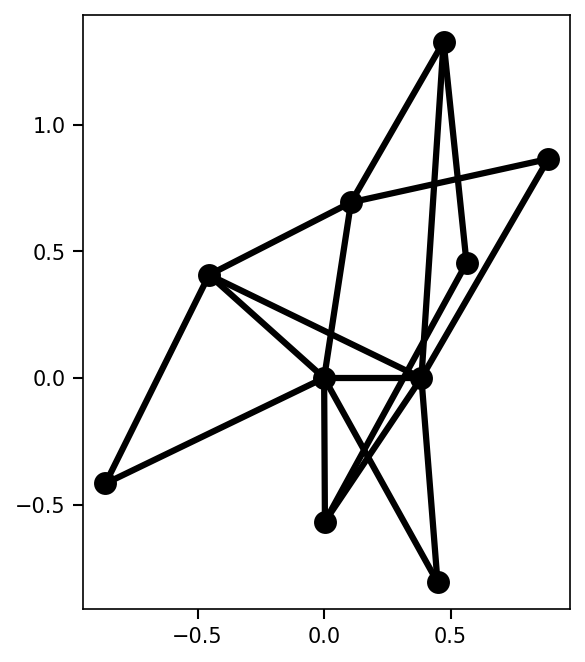

In [12]:
fig = plt.figure()
ax = plt.gca()

ax.scatter(
    coords[:,0],
    coords[:,1],
    color = 'k',
)

for pair in pairs:
    
    ax.plot(
        coords[pair][:,0],
        coords[pair][:,1],
        color = 'k',
    )
    
ax.set_aspect( 'equal' )